In [ ]:
# Implement Genetic Algorithm (GA) and test its functionality on test functions from the previous assignment.

# About GA
# GA works with a binary representation of solutions to the optimization problem and uses elitism,
# crossover and random mutation to produce better solutions for next generations.
# GA (with specific settings for this assignment - population size, elitism, selection process, mutation probability, stopping criterion)

# Randomly generate first generation (G = 1) of 50 solutions and evaluate their quality by an objective function
# While generation number G <= 1000
# G++
# Move best 20% of the population (10 individuals) into the next generation
# 20x
# Use rank/roulette selection mechanism to select 2 mutually different parents
# One-point crossover of parents to produce 2 children binary vectors
# Mutate (bit-flip) each bit of children vectors with a probability of 1%
# Evaluate the quality of children vectors and place them into the next generation
# The next generation should be complete with 50 individuals (best 10 from the previous generation, 40 new children)
# Store the best-found solution as the result (Also keep the best solution from every generation to produce a convergence graph)
# If the best-found solution is optimal, stop the loop.
# Return the best-found solution
# Evaluation

# Use GA on each test function (you should have 5 of them) with the 50D dimensionality (bit strings of length 50),
# run it 30x and find the best, worst, average and median solution quality and the standard deviation.
# Plot the convergence plots for each function and all 30 runs.
# Show the average convergence plot for each function.

# Extra
# Test functions in 10D, 30D, and 100D - adjust the number of generations and population size accordingly


In [ ]:
# Solution 1:
# Task done for 50D only in the code below.
# But the parameters can be modified for 10D, 30D and 100D separately to produce the separate output.

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the objective functions
# Onemax function
def onemax(x):
    return np.sum(x)

In [ ]:
# longest 1 chain function
def longest_1_chain(x):
    longest_chain = 0
    current_chain = 0
    for bit in x:
        if bit == 1:
            current_chain += 1
        else:
            current_chain = 0
        longest_chain = max(longest_chain, current_chain)
    return longest_chain

In [ ]:
# royal road function
def royal_road(x):
    k = 5
    num_blocks = len(x) // k
    fitness = 0
    for i in range(num_blocks):
        block = x[i * k : (i + 1) * k]
        if np.all(block) or not np.any(block):
            fitness += k
    return fitness

In [ ]:
# deceptive trap function
def deceptive_trap(x):
    k = 5
    fitness = 0
    for i in range(0, len(x), k):
        block = x[i:i+k]
        if np.all(block):
            fitness += k
        else:
            fitness += k - np.count_nonzero(block)
    return fitness

In [ ]:
# plateau function
def plateau(x):
    if np.sum(x) == len(x) // 2:
        return len(x) // 2
    else:
        return 0

In [ ]:
# genetic Algorithm
def genetic_algorithm(objective_function, n, population_size=50, elitism=10, mutation_probability=0.01, generations=1000):
    best_solution = None
    best_solution_history = []

    for _ in range(generations):
        population = np.random.randint(2, size=(population_size, n))
        fitness = [objective_function(individual) for individual in population]
        best_solution_index = np.argmax(fitness)
        best_solution_history.append(fitness[best_solution_index])

        if best_solution is None or fitness[best_solution_index] > objective_function(best_solution):
            best_solution = population[best_solution_index]

        if objective_function(best_solution) == n:
            break

        next_generation = population[:elitism]

        while len(next_generation) < population_size:
            parents_indices = np.random.choice(population_size, size=2, replace=False)
            parent1, parent2 = population[parents_indices]
            crossover_point = np.random.randint(n)
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            child1 = np.where(np.random.rand(n) < mutation_probability, 1 - child1, child1)
            child2 = np.where(np.random.rand(n) < mutation_probability, 1 - child2, child2)
            next_generation = np.vstack((next_generation, child1, child2))

        population = next_generation

    return best_solution, best_solution_history

In [ ]:
# Evaluation
test_functions = [onemax, longest_1_chain, royal_road, deceptive_trap, plateau]

Objective Function: onemax
Best: 43, Worst: 38, Average: 39.266666666666666, Median: 39.0, Std Deviation: 1.0934146311237816


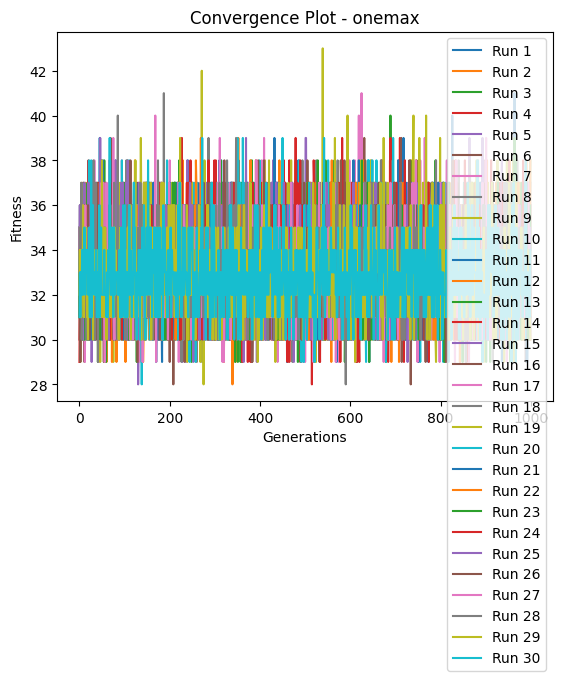

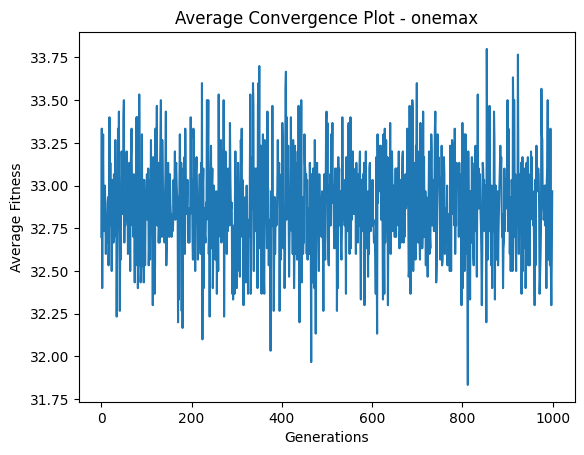

Objective Function: longest_1_chain
Best: 25, Worst: 17, Average: 19.7, Median: 19.0, Std Deviation: 1.7729448195962934


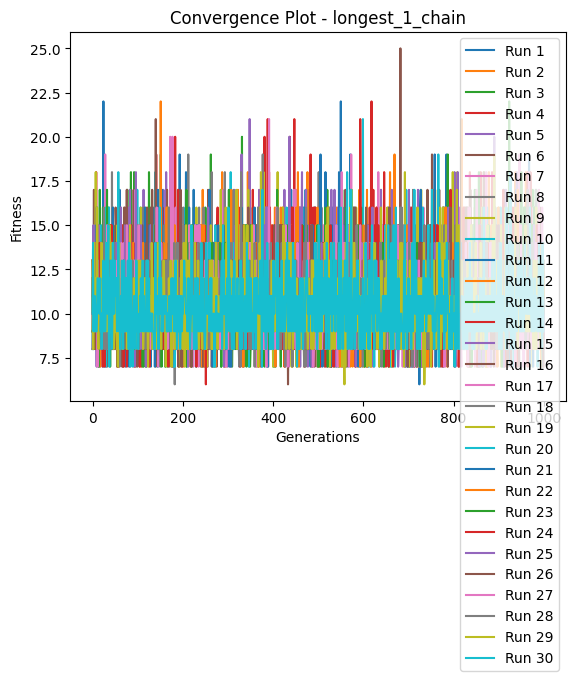

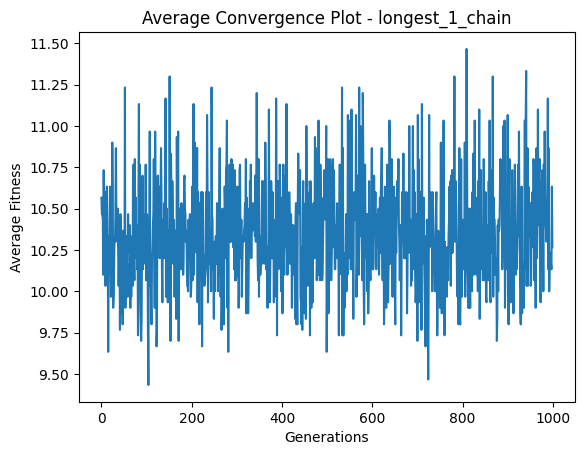

Objective Function: royal_road
Best: 30, Worst: 25, Average: 27.166666666666668, Median: 25.0, Std Deviation: 2.4776781245530843


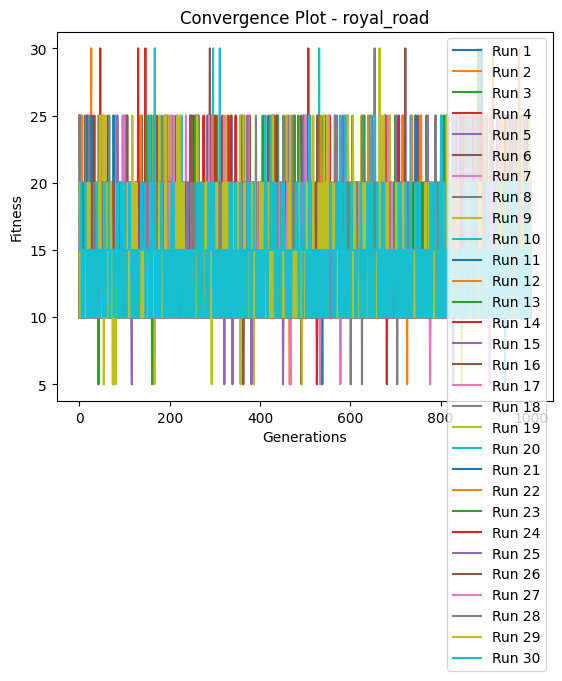

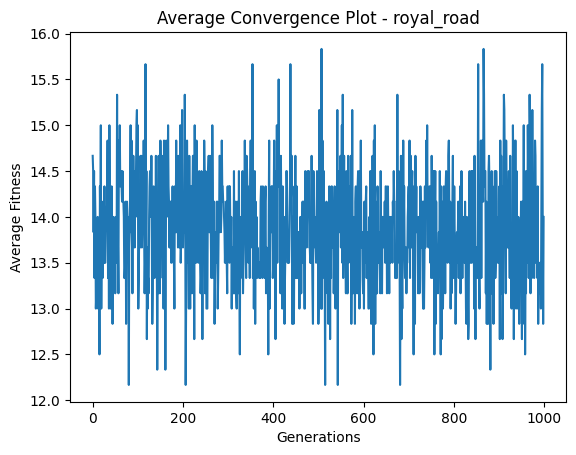

Objective Function: deceptive_trap
Best: 44, Worst: 40, Average: 41.53333333333333, Median: 41.5, Std Deviation: 0.8844332774281066


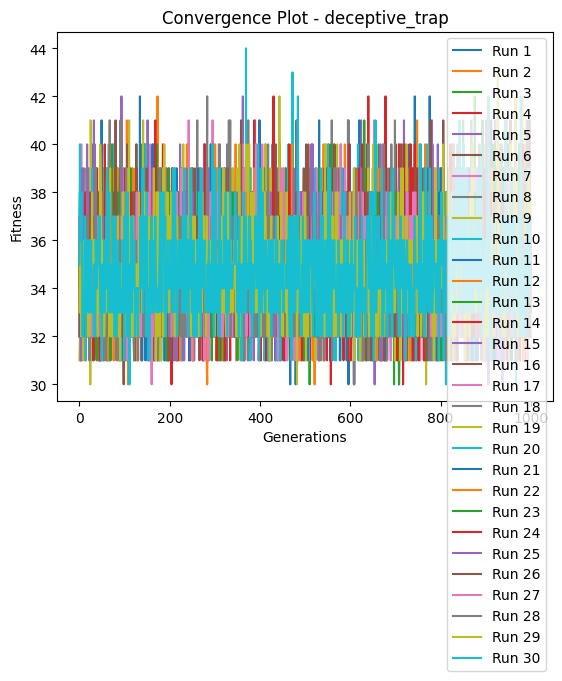

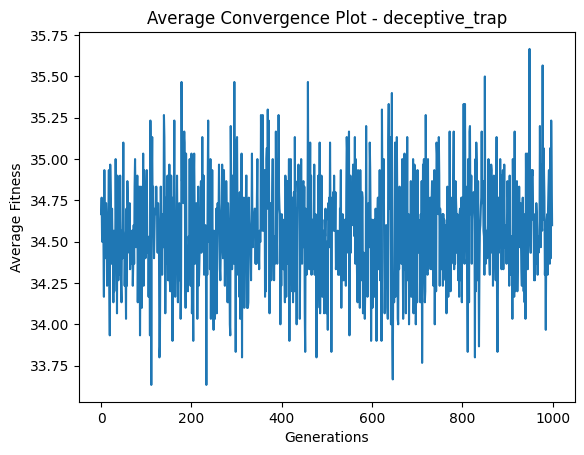

Objective Function: plateau
Best: 25, Worst: 25, Average: 25.0, Median: 25.0, Std Deviation: 0.0


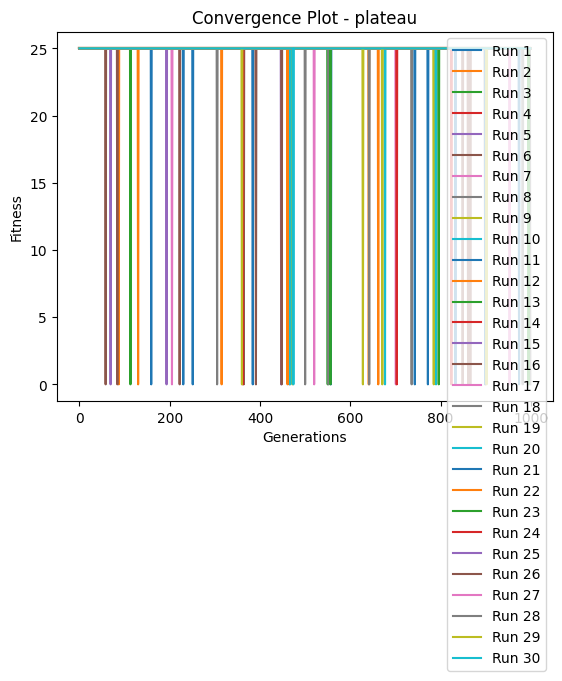

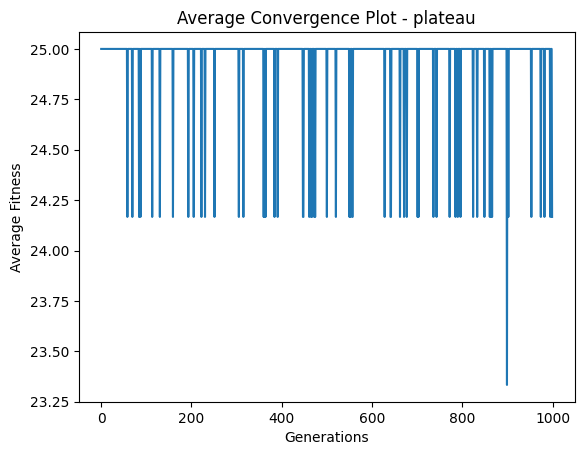

In [ ]:
for objective_function in test_functions:
    results = []
    best_results = []

    for _ in range(30):
        best_solution, best_solution_history = genetic_algorithm(objective_function, n=50)
        results.append(objective_function(best_solution))
        best_results.append(best_solution_history)

    # Calculate statistics
    best = max(results)
    worst = min(results)
    average = np.mean(results)
    median = np.median(results)
    std_deviation = np.std(results)

    print(f"Objective Function: {objective_function.__name__}")
    print(f"Best: {best}, Worst: {worst}, Average: {average}, Median: {median}, Std Deviation: {std_deviation}")

    # Plot the convergence plot for all 30 runs
    for i, best_solution_history in enumerate(best_results):
        plt.plot(best_solution_history, label=f"Run {i + 1}")
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.title(f"Convergence Plot - {objective_function.__name__}")
    plt.legend()
    plt.show()

    # Show the average convergence plot for each function
    average_history = np.zeros(1000)
    for best_solution_history in best_results:
        average_history += np.array(best_solution_history)
    average_history /= 30

    plt.plot(average_history)
    plt.xlabel("Generations")
    plt.ylabel("Average Fitness")
    plt.title(f"Average Convergence Plot - {objective_function.__name__}")
    plt.show()

In [ ]:
# Solution 2:
# Task done for 50D as well as 10D, 30D, and 100D of the bonus part by slightly modifying the above solution.
# Solution 1 is tweaked to accept the multiple dimensions so we dont need to enter dimensions value separately and run for output.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the objective functions

# Onemax function
def onemax(x):
    return np.sum(x)

In [ ]:
# longest 1 chain function
def longest_1_chain(x):
    longest_chain = 0
    current_chain = 0
    for bit in x:
        if bit == 1:
            current_chain += 1
        else:
            current_chain = 0
        longest_chain = max(longest_chain, current_chain)
    return longest_chain

In [ ]:
# royal road function
def royal_road(x):
    k = 5
    num_blocks = len(x) // k
    fitness = 0
    for i in range(num_blocks):
        block = x[i * k : (i + 1) * k]
        if np.all(block) or not np.any(block):
            fitness += k
    return fitness

In [ ]:
# deceptive trap function
def deceptive_trap(x):
    k = 5
    fitness = 0
    for i in range(0, len(x), k):
        block = x[i:i+k]
        if np.all(block):
            fitness += k
        else:
            fitness += k - np.count_nonzero(block)
    return fitness

In [ ]:
# plateau function
def plateau(x):
    if np.sum(x) == len(x) // 2:  # Half of the bits are set to 1
        return len(x) // 2
    else:
        return 0

In [ ]:
# Genetic Algorithm (slightly modified to accept dimensionality as a parameter)
def genetic_algorithm(objective_function, n, population_size, elitism, mutation_probability, generations):
    best_solution = None
    best_solution_history = []

    for _ in range(generations):
        population = np.random.randint(2, size=(population_size, n))
        fitness = [objective_function(individual) for individual in population]
        best_solution_index = np.argmax(fitness)
        best_solution_history.append(fitness[best_solution_index])

        if best_solution is None or fitness[best_solution_index] > objective_function(best_solution):
            best_solution = population[best_solution_index]

        if objective_function(best_solution) == n:
            break

        sorted_indices = np.argsort(fitness)[::-1]
        next_generation = population[sorted_indices[:elitism]]

        while len(next_generation) < population_size:
            parents = population[np.random.choice(population_size, size=2, replace=False)]
            crossover_point = np.random.randint(n)
            child1 = np.concatenate((parents[0][:crossover_point], parents[1][crossover_point:]))
            child2 = np.concatenate((parents[1][:crossover_point], parents[0][crossover_point:]))
            child1 = np.where(np.random.rand(n) < mutation_probability, 1 - child1, child1)
            child2 = np.where(np.random.rand(n) < mutation_probability, 1 - child2, child2)
            next_generation = np.vstack((next_generation, child1, child2))

        population = next_generation

    return best_solution, best_solution_history

In [ ]:
# Define different dimensionalities
n_10 = 10
n_30 = 30
n_50 = 50
n_100 = 100

In [ ]:
# Define GA parameters for each dimensionality
ga_params = {
    n_10: (10, 2, 0.01, 1000),
    n_30: (30, 6, 0.01, 1000),
    n_50: (50, 10, 0.01, 1000),
    n_100: (100, 20, 0.01, 1000)
}

Running GA for dimensionality 10
Objective Function: onemax (Dimensionality 10)
Best: 10, Worst: 10, Average: 10.0, Median: 10.0, Std Deviation: 0.0


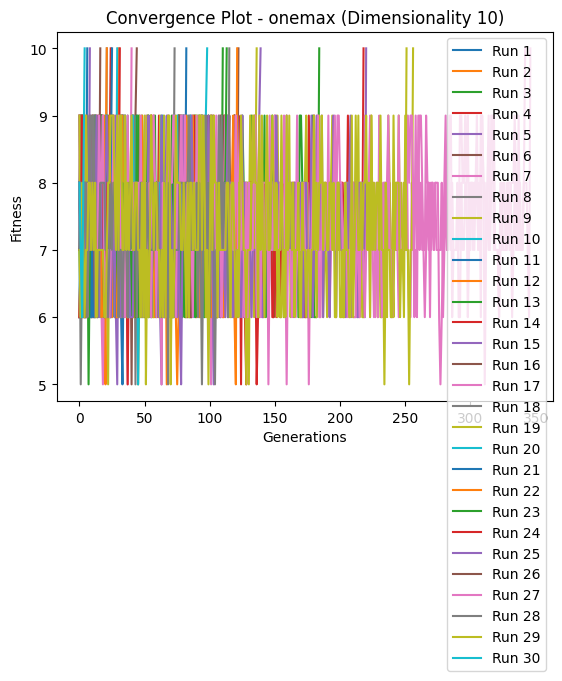

Objective Function: longest_1_chain (Dimensionality 10)
Best: 10, Worst: 10, Average: 10.0, Median: 10.0, Std Deviation: 0.0


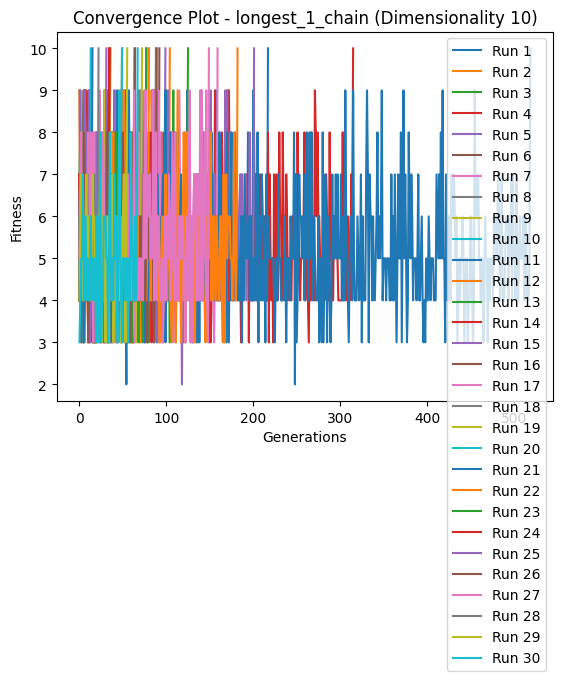

Objective Function: royal_road (Dimensionality 10)
Best: 10, Worst: 10, Average: 10.0, Median: 10.0, Std Deviation: 0.0


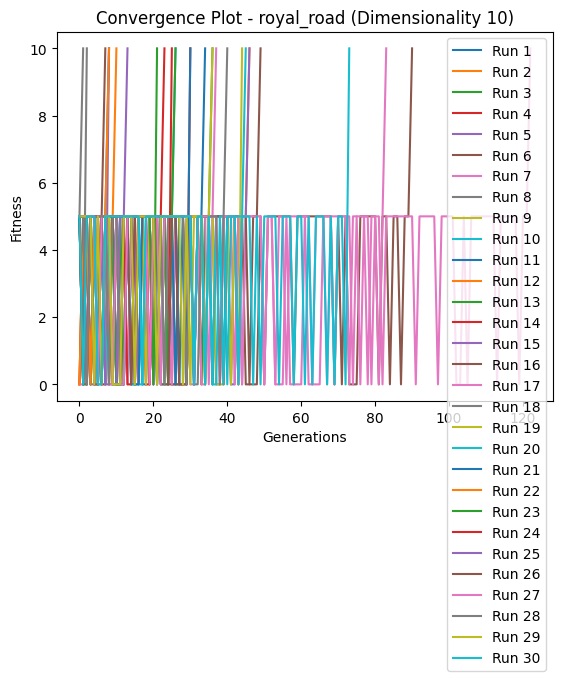

Objective Function: deceptive_trap (Dimensionality 10)
Best: 10, Worst: 10, Average: 10.0, Median: 10.0, Std Deviation: 0.0


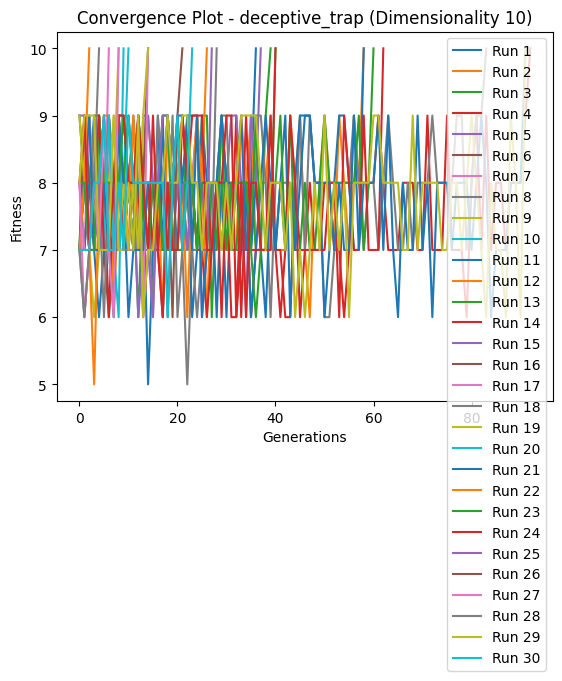

Objective Function: plateau (Dimensionality 10)
Best: 5, Worst: 5, Average: 5.0, Median: 5.0, Std Deviation: 0.0


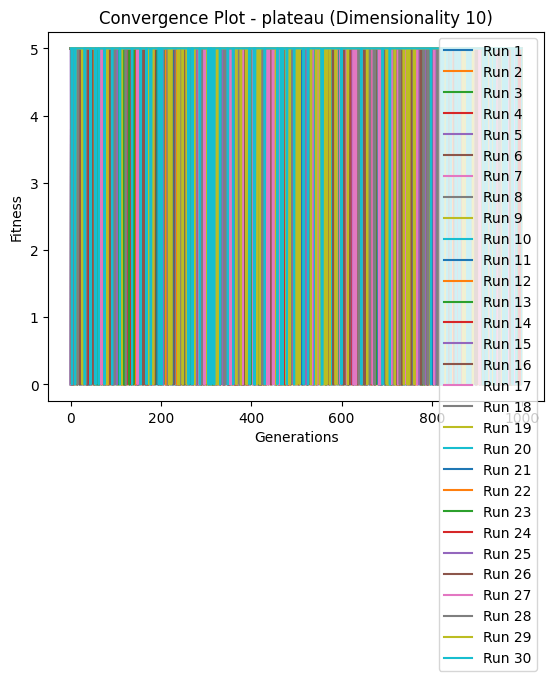

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


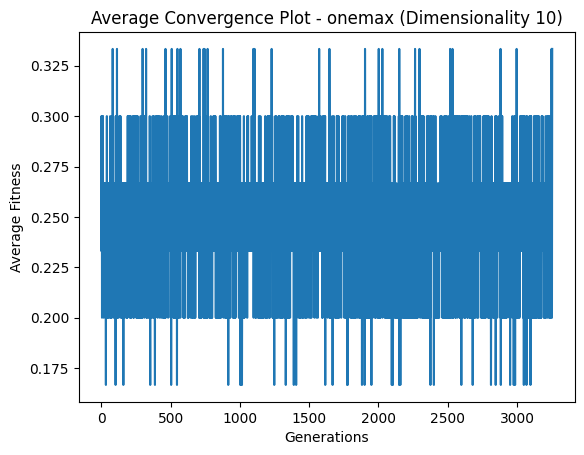

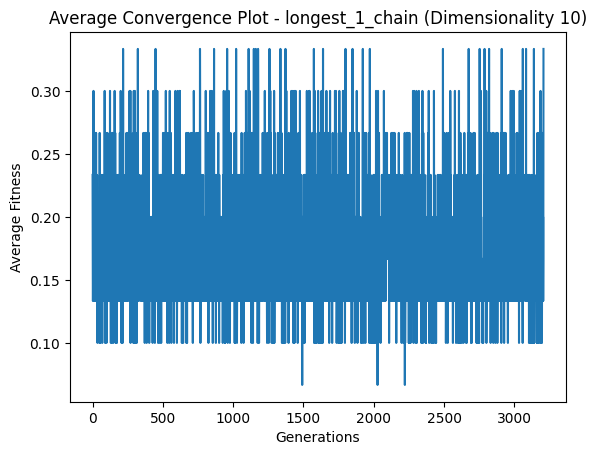

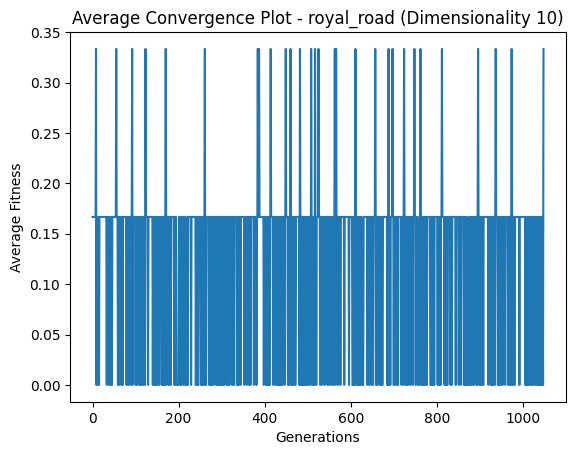

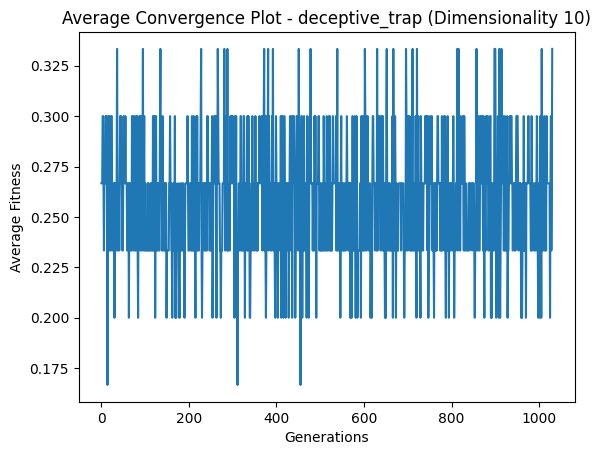

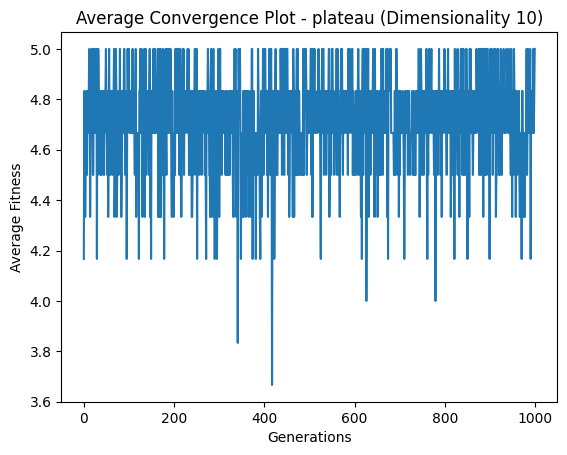

Running GA for dimensionality 30
Objective Function: onemax (Dimensionality 30)
Best: 27, Worst: 25, Average: 25.633333333333333, Median: 26.0, Std Deviation: 0.6046119049072349


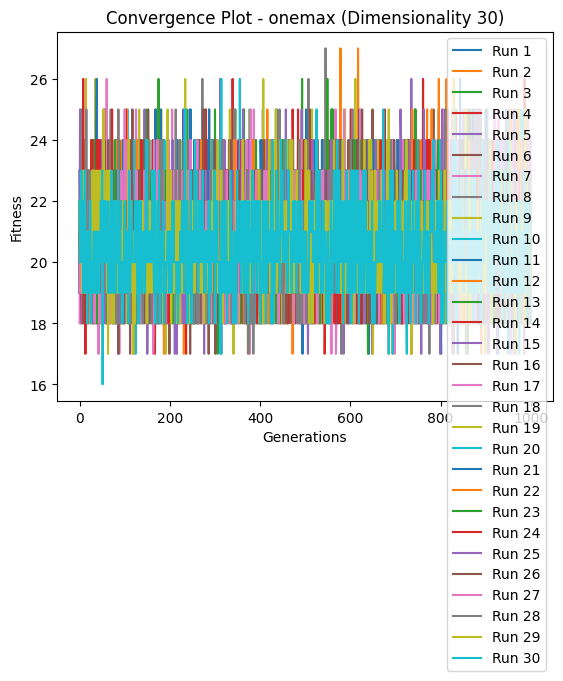

Objective Function: longest_1_chain (Dimensionality 30)
Best: 24, Worst: 15, Average: 17.8, Median: 18.0, Std Deviation: 1.8147543451754935


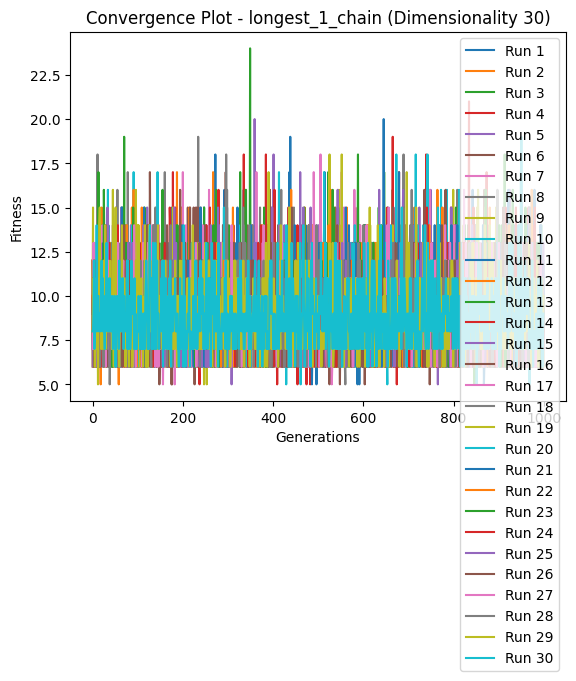

Objective Function: royal_road (Dimensionality 30)
Best: 25, Worst: 15, Average: 20.666666666666668, Median: 20.0, Std Deviation: 2.13437474581095


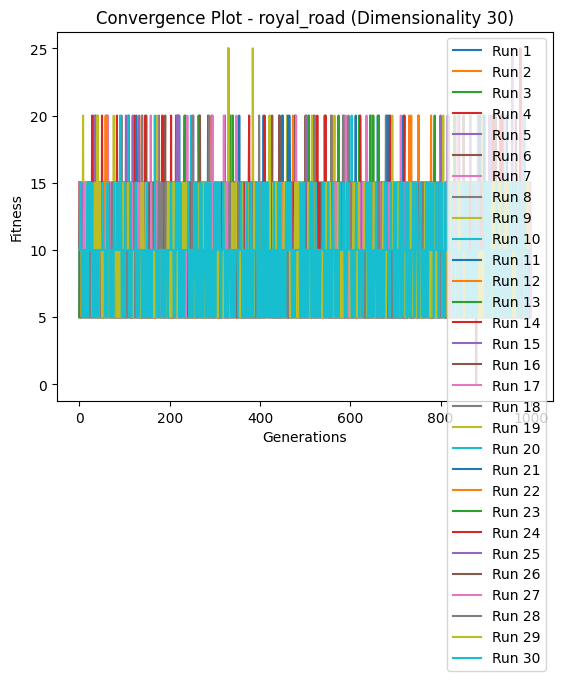

Objective Function: deceptive_trap (Dimensionality 30)
Best: 28, Worst: 26, Average: 26.9, Median: 27.0, Std Deviation: 0.5385164807134505


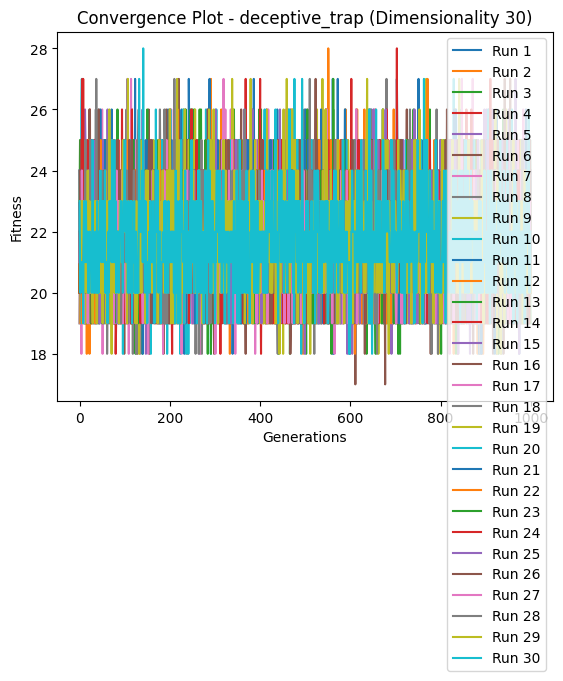

Objective Function: plateau (Dimensionality 30)
Best: 15, Worst: 15, Average: 15.0, Median: 15.0, Std Deviation: 0.0


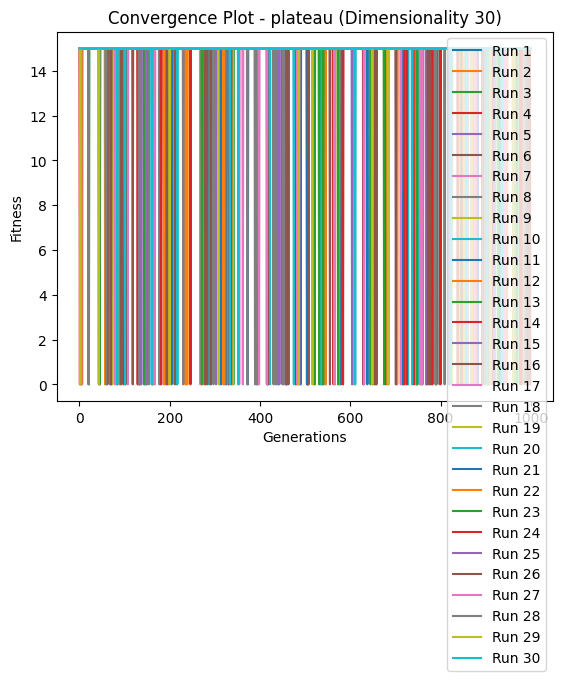

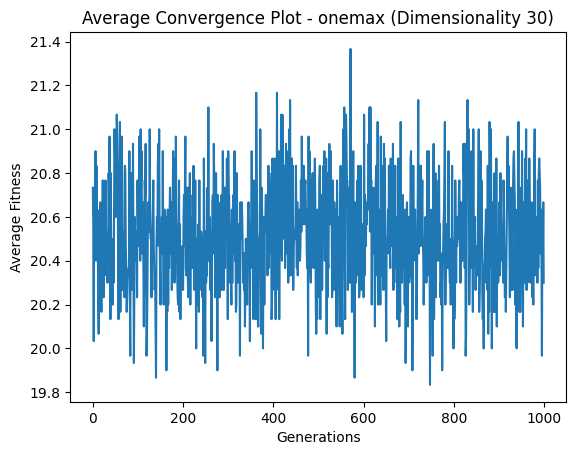

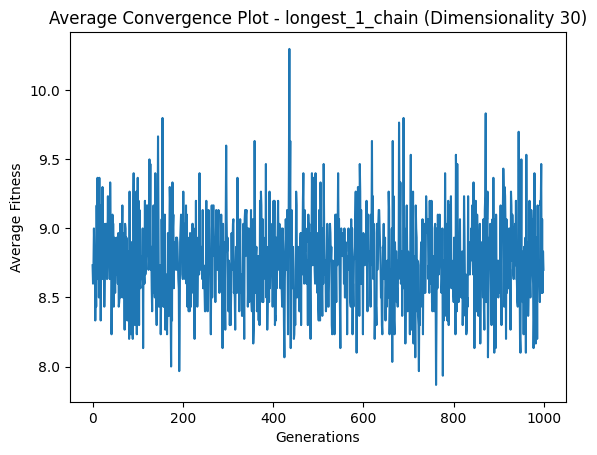

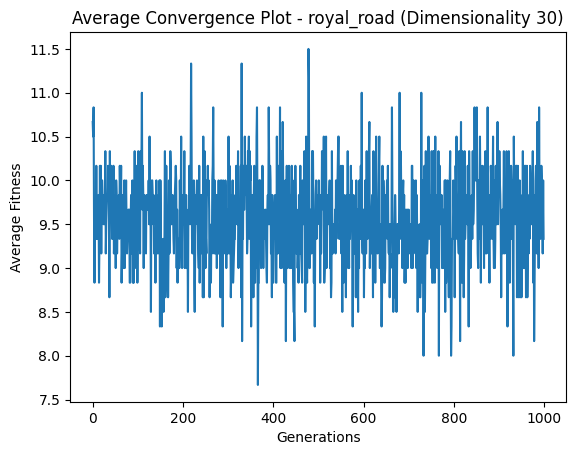

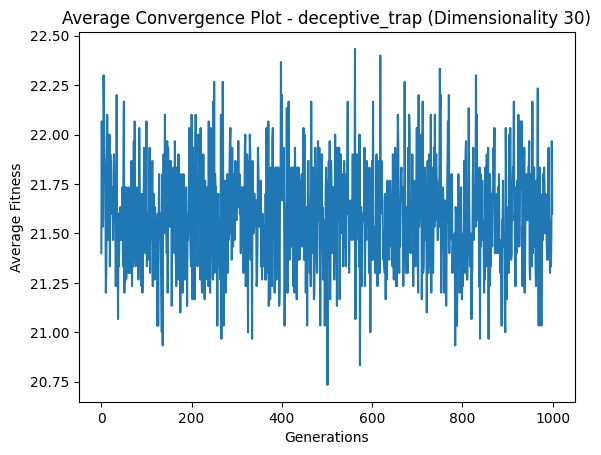

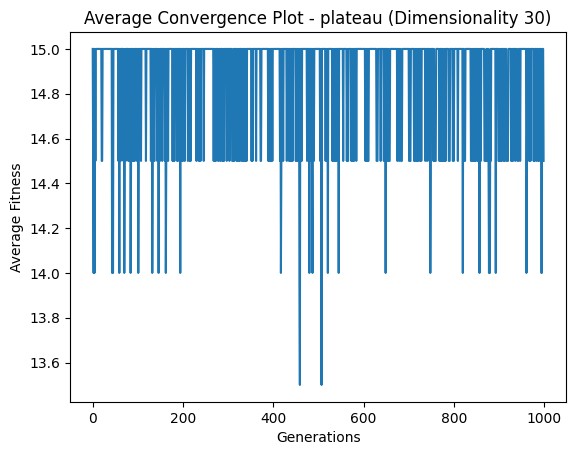

Running GA for dimensionality 50
Objective Function: onemax (Dimensionality 50)
Best: 41, Worst: 38, Average: 39.56666666666667, Median: 39.0, Std Deviation: 0.7608474807008885


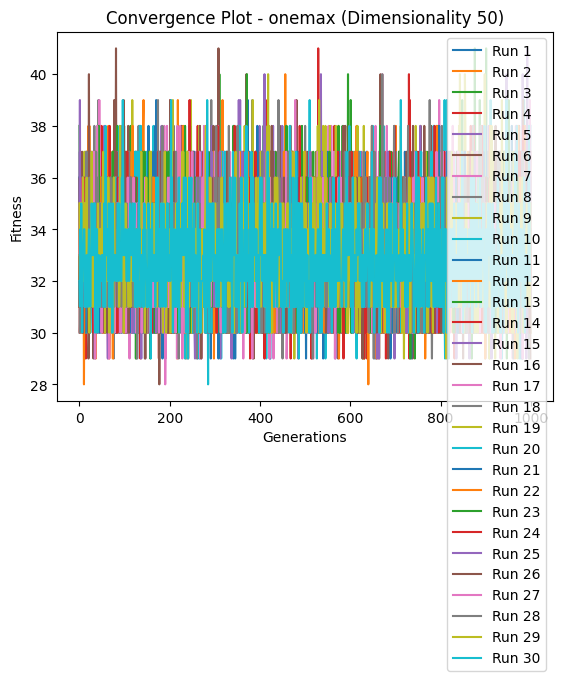

Objective Function: longest_1_chain (Dimensionality 50)
Best: 25, Worst: 18, Average: 19.8, Median: 20.0, Std Deviation: 1.4696938456699071


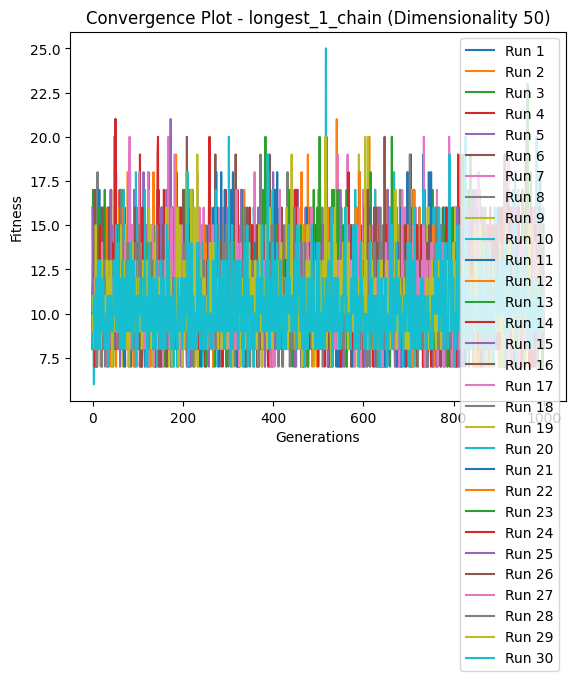

Objective Function: royal_road (Dimensionality 50)
Best: 35, Worst: 25, Average: 26.666666666666668, Median: 25.0, Std Deviation: 2.981423969999719


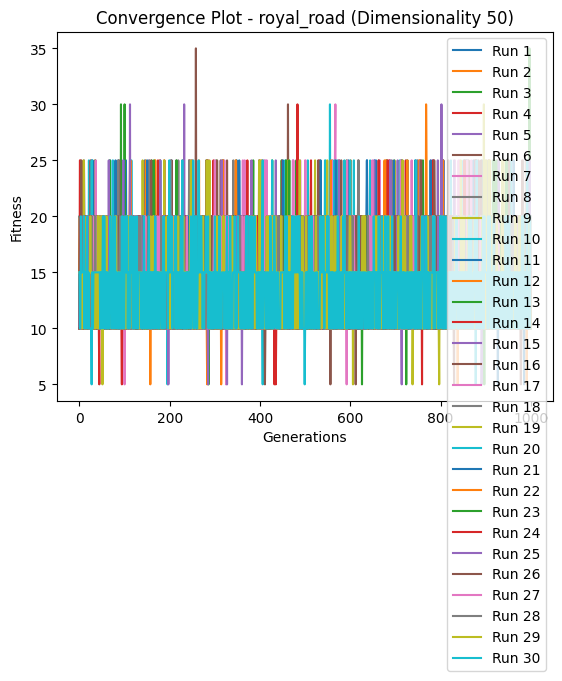

Objective Function: deceptive_trap (Dimensionality 50)
Best: 44, Worst: 40, Average: 41.63333333333333, Median: 41.5, Std Deviation: 0.8359957469322967


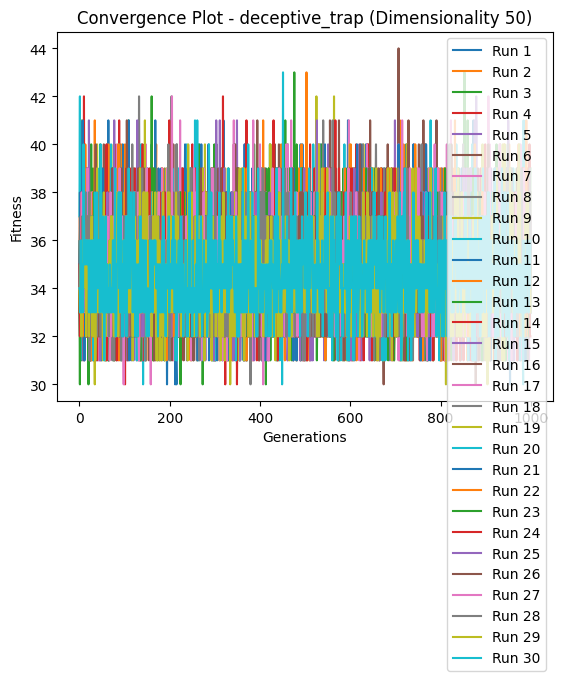

Objective Function: plateau (Dimensionality 50)
Best: 25, Worst: 25, Average: 25.0, Median: 25.0, Std Deviation: 0.0


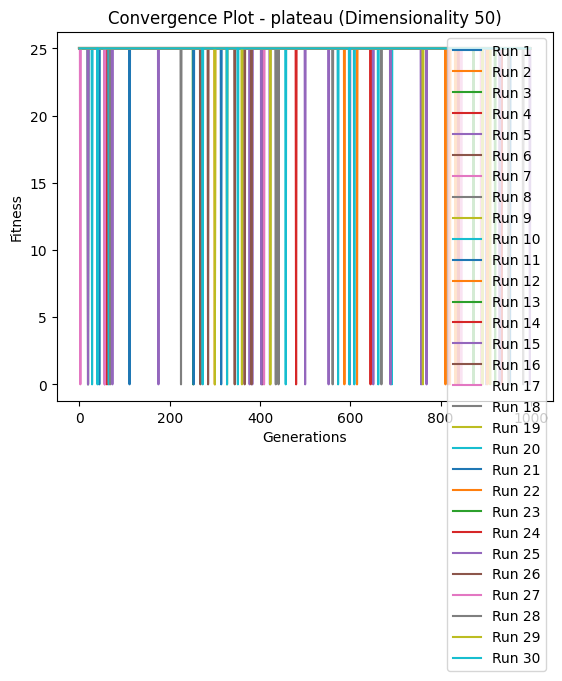

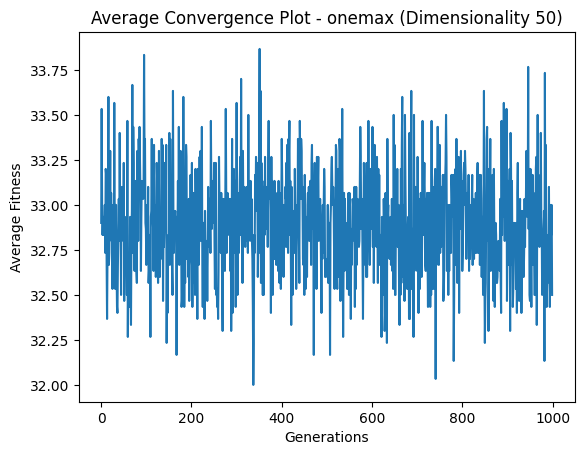

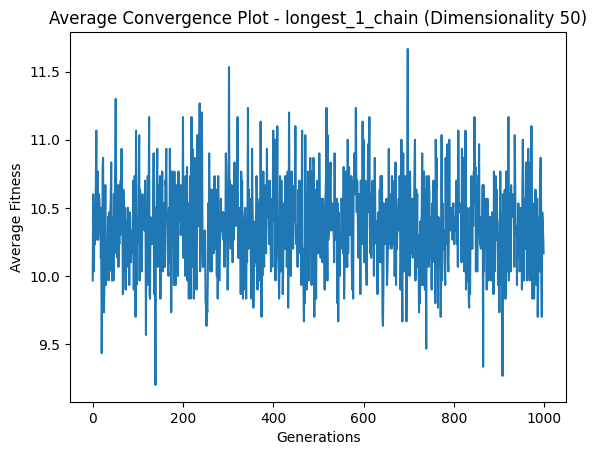

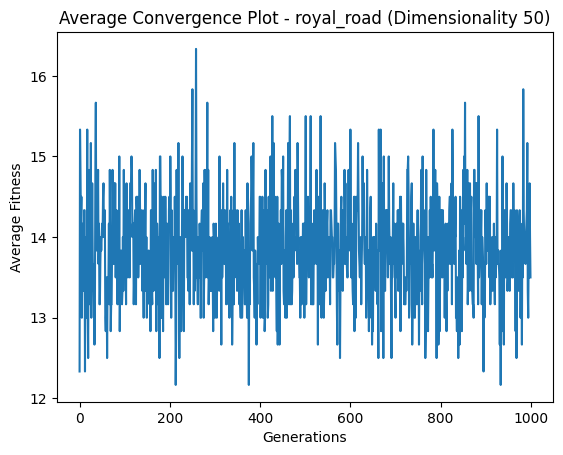

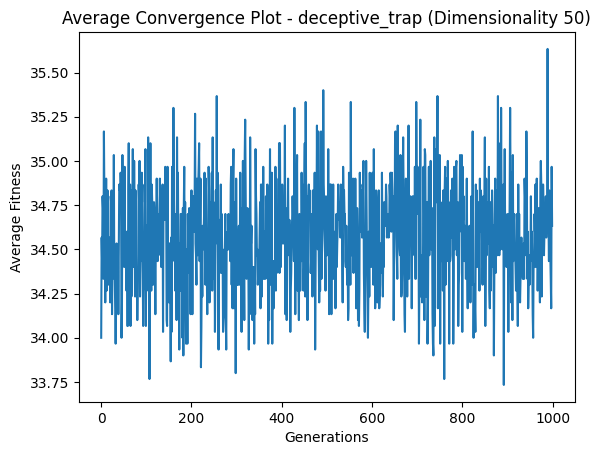

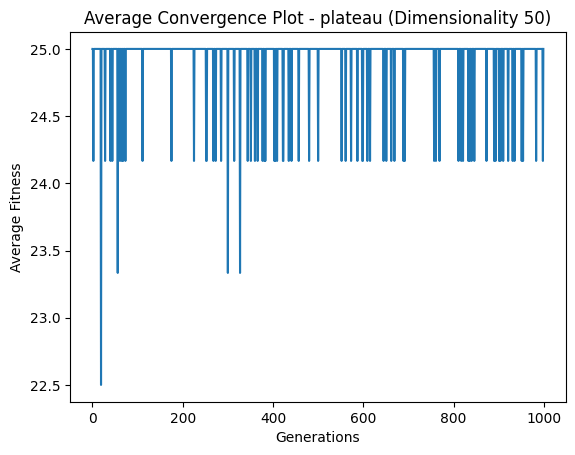

Running GA for dimensionality 100
Objective Function: onemax (Dimensionality 100)
Best: 75, Worst: 70, Average: 71.7, Median: 72.0, Std Deviation: 1.159022576714247


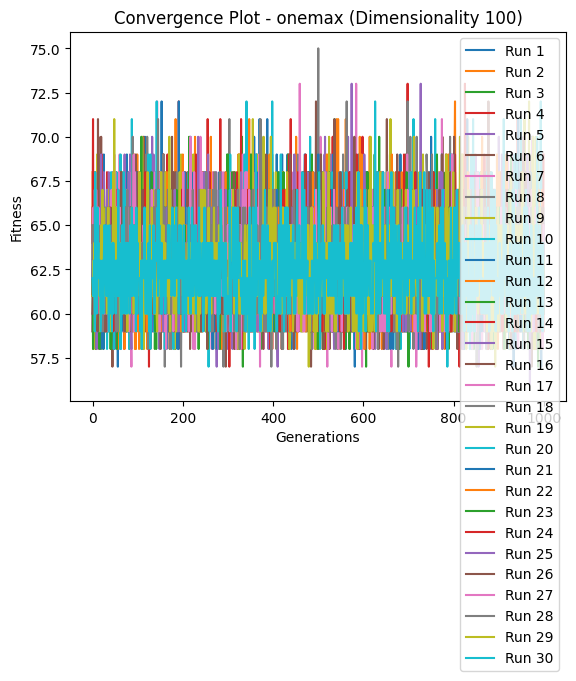

Objective Function: longest_1_chain (Dimensionality 100)
Best: 25, Worst: 19, Average: 22.133333333333333, Median: 22.0, Std Deviation: 1.4996295838935993


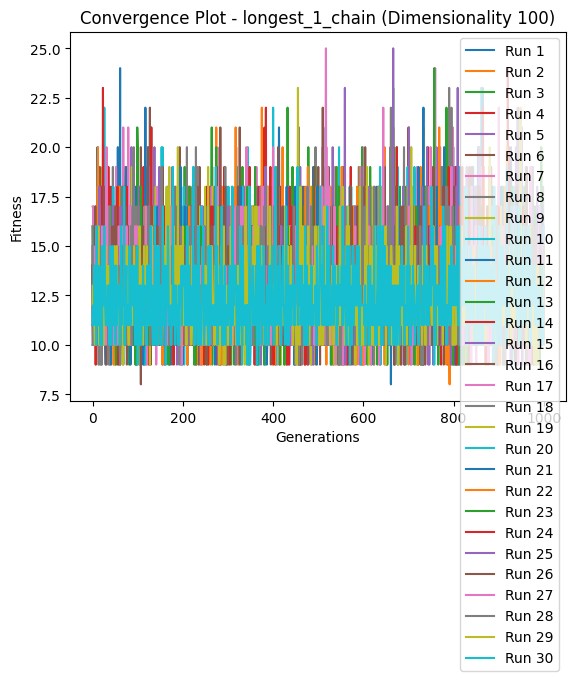

Objective Function: royal_road (Dimensionality 100)
Best: 45, Worst: 35, Average: 38.833333333333336, Median: 40.0, Std Deviation: 2.7938424357067015


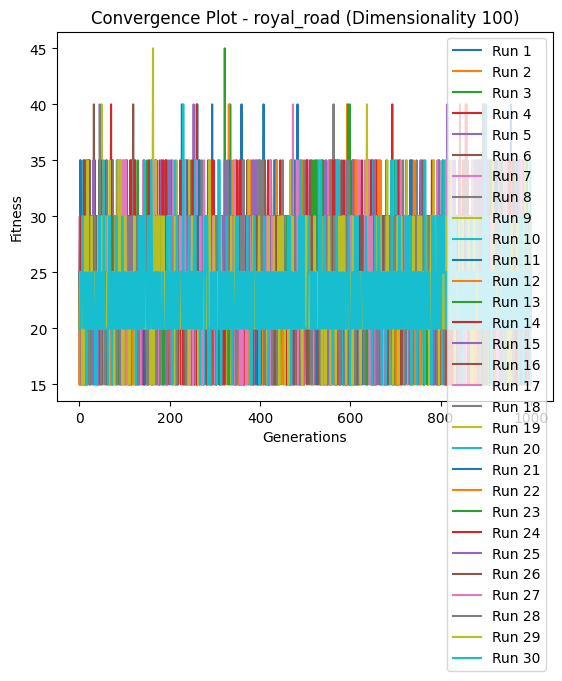

Objective Function: deceptive_trap (Dimensionality 100)
Best: 79, Worst: 73, Average: 75.46666666666667, Median: 75.0, Std Deviation: 1.4079141387961918


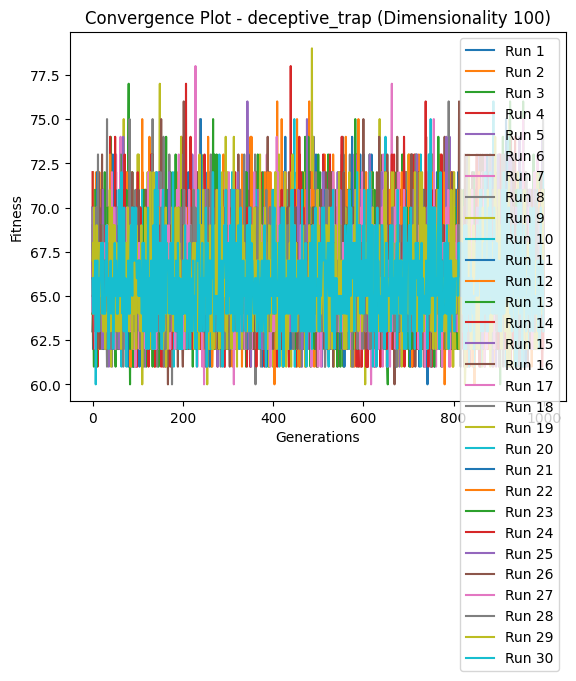

Objective Function: plateau (Dimensionality 100)
Best: 50, Worst: 50, Average: 50.0, Median: 50.0, Std Deviation: 0.0


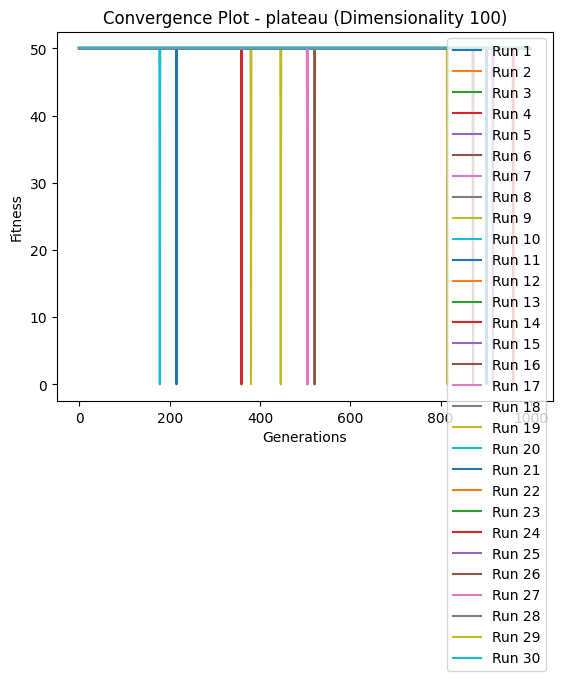

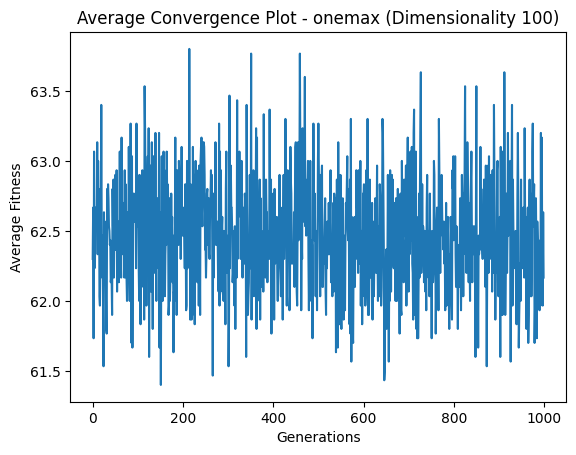

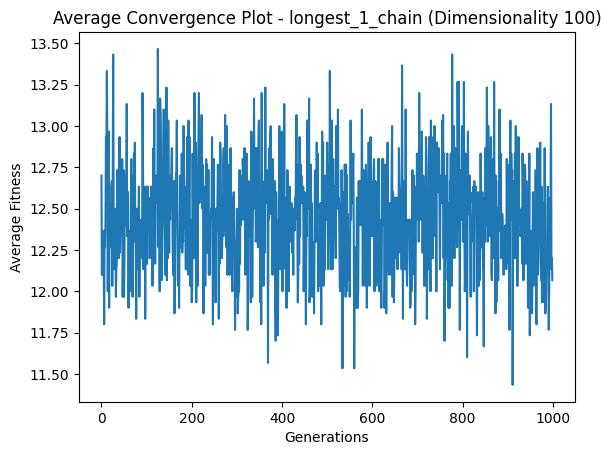

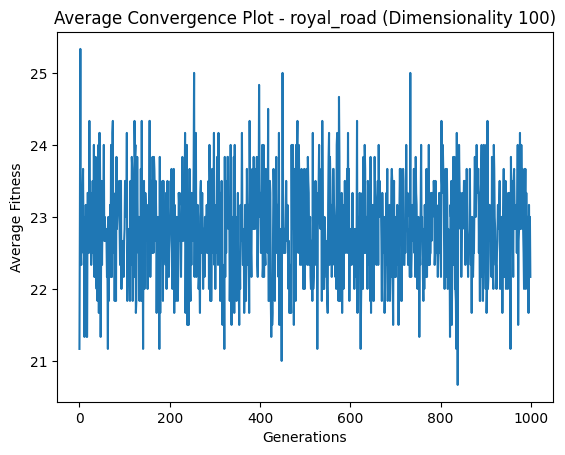

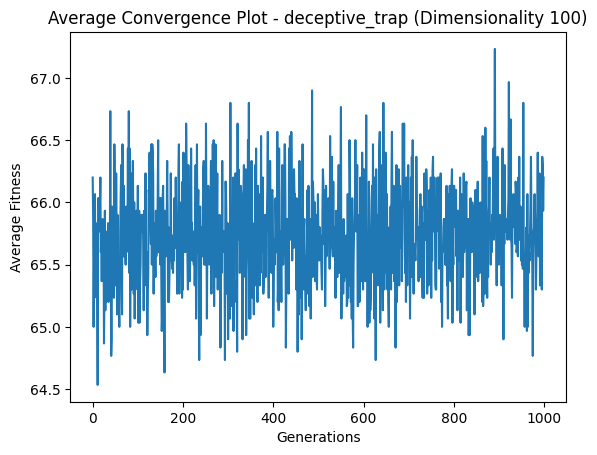

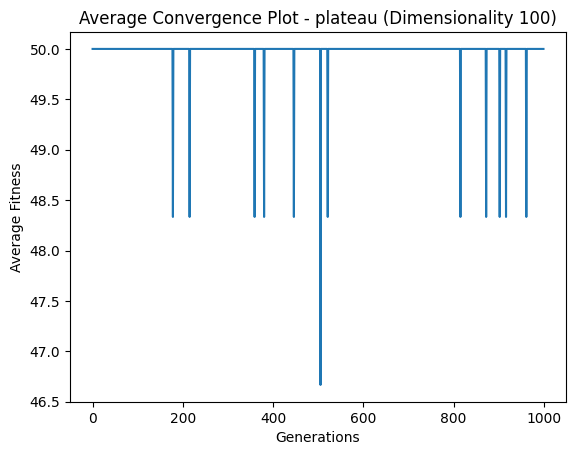

In [ ]:
# Loop over different dimensionalities
for n, params in ga_params.items():
    population_size, elitism, mutation_probability, generations = params
    print(f"Running GA for dimensionality {n}")

    test_functions = [onemax, longest_1_chain, royal_road, deceptive_trap, plateau]

    # Store the results for each function and dimension
    results_dict = {func.__name__: [] for func in test_functions}
    best_results_dict = {func.__name__: [] for func in test_functions}

    for objective_function in test_functions:
        results = []
        best_results = []
        for _ in range(30):
            best_solution, best_solution_history = genetic_algorithm(objective_function, n, population_size, elitism, mutation_probability, generations)
            results.append(objective_function(best_solution))
            best_results.append(best_solution_history)

            # Store results for each function
            results_dict[objective_function.__name__].append(objective_function(best_solution))
            best_results_dict[objective_function.__name__].append(best_solution_history)

        # Calculate statistics
        best = max(results)
        worst = min(results)
        average = np.mean(results)
        median = np.median(results)
        std_deviation = np.std(results)

        print(f"Objective Function: {objective_function.__name__} (Dimensionality {n})")
        print(f"Best: {best}, Worst: {worst}, Average: {average}, Median: {median}, Std Deviation: {std_deviation}")

        # Plot the convergence plot for all 30 runs
        for i, best_solution_history in enumerate(best_results):
            plt.plot(best_solution_history, label=f"Run {i + 1}")
        plt.xlabel("Generations")
        plt.ylabel("Fitness")
        plt.title(f"Convergence Plot - {objective_function.__name__} (Dimensionality {n})")
        plt.legend()
        plt.show()

    # Show the average convergence plot for each function in this dimensionality
    for objective_function in test_functions:
        average_history = np.mean(best_results_dict[objective_function.__name__], axis=0)
        plt.plot(average_history)
        plt.xlabel("Generations")
        plt.ylabel("Average Fitness")
        plt.title(f"Average Convergence Plot - {objective_function.__name__} (Dimensionality {n})")
        plt.show()